# Atividade: Meu Primeiro Classificador

## Aluno: Paulo César Moraes de Menezes

O objetivo desta atividade foi de desenvolver um ensemble de classificadores para a base de dados ```dataBinaryOutput.xlsx```. 

O ensemble deveria contem no mínimo 4 modelos.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras


## Importando as bibliotecas

```python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# pandas -> biblioteca para manipulação de dados
# matplotlib -> biblioteca para plotar gráficos
# seaborn -> biblioteca para plotar gráficos
# train_test_split -> função para dividir os dados em treino e teste
# LogisticRegression -> classe do modelo de regressão logística
# RandomForestClassifier -> classe do modelo de random forest
# GradientBoostingClassifier -> classe do modelo de gradient boosting
# VotingClassifier -> classe do modelo de ensemble
# SVC -> classe do modelo de support vector machine
# accuracy_score -> função para calcular a acurácia
# KNeighborsClassifier -> classe do modelo de KNN
```

In [103]:
df = pd.read_excel('dataBinaryOutput.xlsx')

## Importando o conjunto de dados

```python

df = pd.read_excel('dataBinaryOutput.xlsx')

# pd.read_excel -> função para ler o arquivo excel
```

In [104]:
df['Target'].value_counts()

Target
0    356
1    212
Name: count, dtype: int64

### Verificando a variável target

```python

df['Target'].value_counts()

# df['Target'] -> seleciona a coluna target
# value_counts() -> conta a quantidade de cada valor
```

    0    356
    1    212
    Name: Target, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.3, random_state=42)

### Criando o conjunto de treino e teste do primeiro ensemble

```python

X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.3, random_state=42)

# train_test_split -> função para dividir os dados em treino e teste
# df.drop('Target', axis=1) -> seleciona todas as colunas menos a target
# df['Target'] -> seleciona a coluna target
# test_size = 0.3 -> define o tamanho do conjunto de teste
# random_state=42 -> define a semente para o random
```

In [106]:
logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
xgb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

### Criando os modelos

```python

logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
xgb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# LogisticRegression -> classe do modelo de regressão logística
# RandomForestClassifier -> classe do modelo de random forest
# SVC -> classe do modelo de support vector machine
# GradientBoostingClassifier -> classe do modelo de gradient boosting
```


In [107]:
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=42)

In [108]:
ensamble_model = VotingClassifier(estimators=[
    ('logistic_Regression', logistic_regression_model),
    ('random_forest', random_forest_model),
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting= 'soft')

### Criando o ensemble

```python

ensamble_model = VotingClassifier(estimators=[
    ('logistic_Regression', logistic_regression_model),
    ('random_forest', random_forest_model),
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting= 'soft')

# VotingClassifier -> classe do modelo de ensemble
# estimators -> lista com os modelos que serão utilizados no ensemble
# voting -> define o tipo de votação
```

In [109]:
ensamble_model.fit(X_train, y_train)
y_pred = ensamble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Criando, treinando e verificando a acuracia do ensemble

```python

ensamble_model.fit(X_train, y_train)
y_pred = ensamble_model.predict(X_test)
accuracy_score(y_test, y_pred)

# ensamble_model.fit -> treina o modelo
# ensamble_model.predict -> faz a predição
# accuracy_score -> função para calcular a acurácia
```

In [110]:
print('Acurácia do modelo de regressão logística: ', round((accuracy_score(y_test, logistic_regression_model.predict(X_test))), 2))
print('Acurácia do modelo de random forest: ', round((accuracy_score(y_test, random_forest_model.predict(X_test))), 2))
print('Acurácia do modelo de SVM: ', round((accuracy_score(y_test, svm_model.predict(X_test))), 2))
print('Acurácia do modelo de XGB: ', round((accuracy_score(y_test, xgb_model.predict(X_test))), 2))
print('Acurácia do modelo de ensamble: ', round((accuracy_score(y_test, ensamble_model.predict(X_test))), 2))


Acurácia do modelo de regressão logística:  0.96
Acurácia do modelo de random forest:  0.96
Acurácia do modelo de SVM:  0.87
Acurácia do modelo de XGB:  0.94
Acurácia do modelo de ensamble:  0.95


### Exibindo a acurácia de cada modelo

```python

print('Acurácia do modelo de regressão logística: ', round((accuracy_score(y_test, logistic_regression_model.predict(X_test))), 2))
print('Acurácia do modelo de random forest: ', round((accuracy_score(y_test, random_forest_model.predict(X_test))), 2))
print('Acurácia do modelo de SVM: ', round((accuracy_score(y_test, svm_model.predict(X_test))), 2))
print('Acurácia do modelo de XGB: ', round((accuracy_score(y_test, xgb_model.predict(X_test))), 2))
print('Acurácia do modelo de ensamble: ', round((accuracy_score(y_test, ensamble_model.predict(X_test))), 2))

# accuracy_score -> função para calcular a acurácia
```

    Acurácia do modelo de regressão logística:  0.96
    Acurácia do modelo de random forest:  0.96
    Acurácia do modelo de SVM:  0.87
    Acurácia do modelo de XGB:  0.94
    Acurácia do modelo de ensamble:  0.95


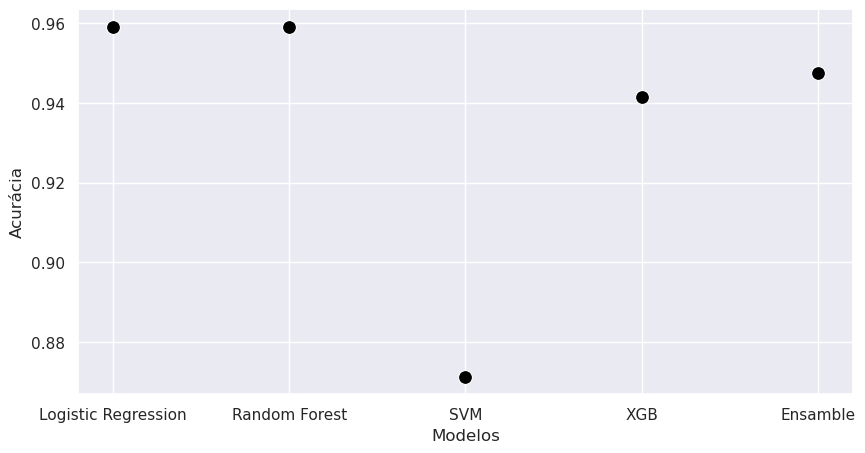

In [111]:
models = [logistic_regression_model, random_forest_model, svm_model, xgb_model, ensamble_model]
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'XGB', 'Ensamble']
accuracies = []

for model in models:
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

sns.set(rc={'figure.figsize':(10, 5)})
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
sns.scatterplot(x=model_names, y=accuracies, s=100, color='black')
plt.show()

## Criando um novo Ensemble

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.3, random_state=42)


Criando conjunto de testes e treino novamente.

In [113]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)


In [114]:
random_forest_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Modelos:

Desta vez utiliza-se o ```knn``` ao invés do ```XGB```.

```python

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
```

In [115]:
new_ensemble_model = VotingClassifier(estimators=[
    ('random_forest', random_forest_model),
    ('xgboost', xgb_model),
    ('svm', svm_model),
    ('knn', knn_model)
], voting='soft')  

Criando um novo ensemble.

In [116]:
new_ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              GradientBoostingClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1, probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

Ajusando o modelo com ```.fit()```.


In [117]:

X_test_np = X_test.values

y_pred = new_ensemble_model.predict(X_test_np)

accuracy = accuracy_score(y_test, y_pred)


/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Convertendo o X_test em um array com ```.values```, e em sequência fazendo a predição e calculando a acurácia com ```.predict()``` e ```accuracy_score()```.


In [118]:
print(f'Acurácia do modelo Random Forest: {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')
print(f'Acurácia do modelo XGBoost: {round(accuracy_score(y_test, xgb_model.predict(X_test)), 2)}')
print(f'Acurácia do modelo SVM: {round(accuracy_score(y_test, svm_model.predict(X_test)), 2)}')
print(f'Acurácia do modelo KNN: {round(accuracy_score(y_test, knn_model.predict(X_test_np)), 2)}')
print(f'Acurácia do modelo Ensamble: {round(accuracy_score(y_test, new_ensemble_model.predict(X_test_np)), 2)}')

Acurácia do modelo Random Forest: 0.96
Acurácia do modelo XGBoost: 0.94
Acurácia do modelo SVM: 0.87
Acurácia do modelo KNN: 0.9
Acurácia do modelo Ensamble: 0.93


/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Verificando a acurácia de cada modelo.

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


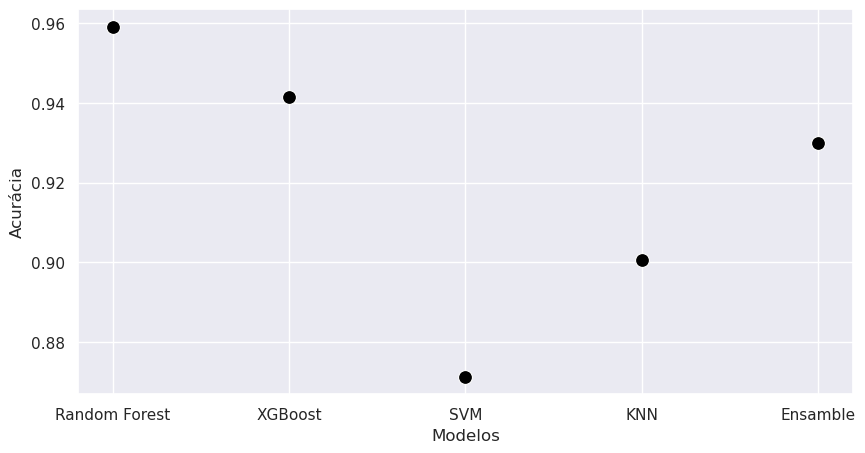

In [119]:
models = [random_forest_model, xgb_model, svm_model, knn_model, new_ensemble_model]
model_names = ['Random Forest', 'XGBoost', 'SVM', 'KNN', 'Ensamble']
accuracies = []

for model in models:
    accuracies.append(accuracy_score(y_test, model.predict(X_test_np)))

sns.set(rc={'figure.figsize':(10, 5)})
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
sns.scatterplot(x=model_names, y=accuracies, s=100, color='black')
plt.show()

## Construindo um Ensemble utilizando Rede Neural.


In [125]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.3, random_state=42)


Definindo o conjunto de treino e teste.

In [126]:
def create_nn_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_dim=input_dim),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Criando uma função ```create_nn_model()``` para criar o modelo de rede neural.

```python

def create_nn_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_dim=input_dim),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# keras.Sequential -> função para criar o modelo - Recebe como parâmetro uma lista com as camadas
# keras.layers.Dense -> função para criar uma camada densa, os parâmetros são:
#   - units -> quantidade de neurônios
#   - activation -> função de ativação
#   - input_dim -> quantidade de entradas

# keras.layers.Dropout -> função para criar uma camada de dropout, os parâmetros são:
#   - rate -> taxa de dropout

# model.compile -> função para compilar o modelo, os parâmetros são:
#   - optimizer -> otimizador ('adam' indica que será utilizado o algoritmo de Adam)
#   - loss -> função de perda (binary_crossentropy indica que será utilizado a entropia cruzada binária)
#   - metrics -> métrica de avaliação (accuracy indica que será utilizado a acurácia)


In [128]:
nn_model_1 = create_nn_model(X_train.shape[1])
nn_model_2 = create_nn_model(X_train.shape[1])
nn_model_3 = create_nn_model(X_train.shape[1])

nn_model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_model_3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 38.4926 - accuracy: 0.6120 - val_loss: 16.5057 - val_accuracy: 0.3625
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 33.9733 - accuracy: 0.4637 - val_loss: 31.4777 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 25.9035 - accuracy: 0.4921 - val_loss: 9.7536 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 20.4737 - accuracy: 0.5741 - val_loss: 8.3704 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 18.9519 - accuracy: 0.5931 - val_loss: 11.4967 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 14.8868 - accuracy: 0.5647 - val_loss: 3.8633 - val_accuracy: 0.4375
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 10.1040 - accuracy: 0.6341 - val_loss: 2.7125 - val_accuracy: 0.6000
E

Criando e treinando o modelo.

```python

nn_model_1 = create_nn_model(X_train.shape[1])
nn_model_2 = create_nn_model(X_train.shape[1])
nn_model_3 = create_nn_model(X_train.shape[1])

nn_model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_model_3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# model.fit -> função para treinar o modelo, os parâmetros são:
#   - X_train -> conjunto de treino
#   - y_train -> target de treino
#   - epochs -> quantidade de épocas
#   - batch_size -> tamanho do batch (quantidade de dados que serão utilizados para atualizar os pesos)
#   - validation_split -> porcentagem dos dados de treino que serão utilizados para validação
```

In [130]:
preds_1 = nn_model_1.predict(X_test)
preds_2 = nn_model_2.predict(X_test)
preds_3 = nn_model_3.predict(X_test)


preds_1_classes = np.round(preds_1).flatten()
preds_2_classes = np.round(preds_2).flatten()
preds_3_classes = np.round(preds_3).flatten()

6/6 [==============================] - 0s 2ms/step


Criando as predições.

```python

preds_1 = nn_model_1.predict(X_test)
preds_2 = nn_model_2.predict(X_test)
preds_3 = nn_model_3.predict(X_test)

preds_1_classes = np.round(preds_1).flatten()
preds_2_classes = np.round(preds_2).flatten()
preds_3_classes = np.round(preds_3).flatten()

# model.predict -> função para fazer a predição
# np.round -> função para arredondar os valores
# flatten() -> função para transformar o array em um vetor
```

In [132]:
final_preds = np.round((preds_1 + preds_2 + preds_3) / 3).flatten()

accuracy = accuracy_score(y_test, final_preds)

Criando as predições e calculando a acurácia.

```python

final_preds = np.round((preds_1 + preds_2 + preds_3) / 3).flatten()
accuracy = accuracy_score(y_test, final_preds)

# accuracy_score -> função para calcular a acurácia
```

In [133]:
print(f'Acurácia do modelo 1: {round(accuracy_score(y_test, preds_1_classes), 2)}')
print(f'Acurácia do modelo 2: {round(accuracy_score(y_test, preds_2_classes), 2)}')
print(f'Acurácia do modelo 3: {round(accuracy_score(y_test, preds_3_classes), 2)}')
print(f'Acurácia do modelo Ensamble: {round(accuracy_score(y_test, final_preds), 2)}')

Acurácia do modelo 1: 0.9
Acurácia do modelo 2: 0.89
Acurácia do modelo 3: 0.9
Acurácia do modelo Ensamble: 0.89


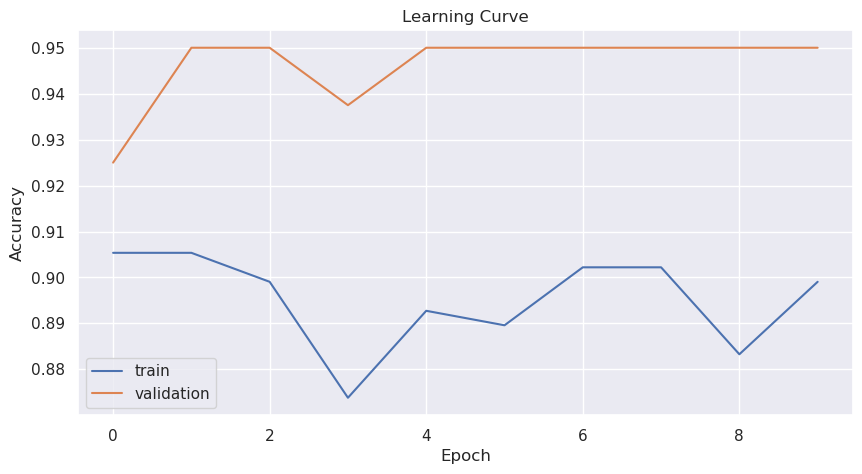

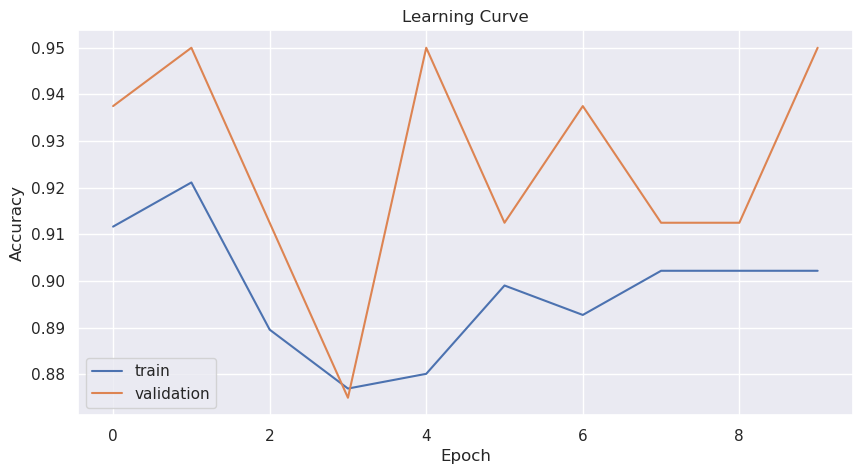

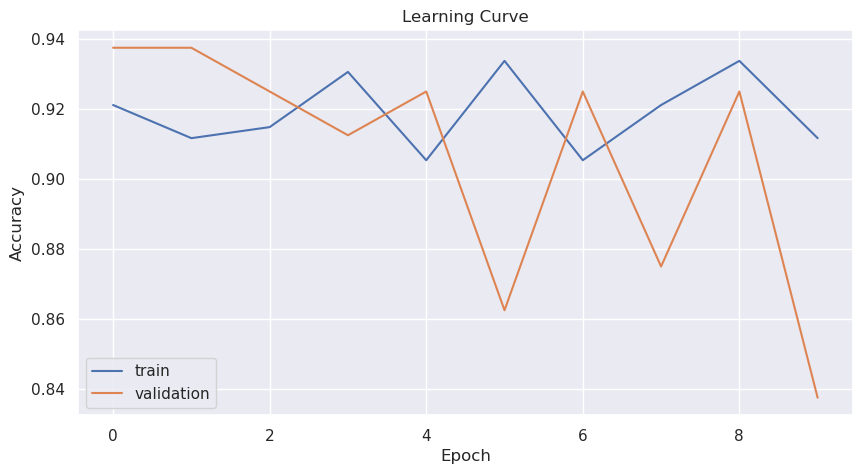

In [134]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Treinamento
history_1 = nn_model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
history_2 = nn_model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
history_3 = nn_model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

plot_learning_curve(history_1)
plot_learning_curve(history_2)
plot_learning_curve(history_3)
